In [33]:
import random
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.datasets.samples_generator import make_blobs
%matplotlib inline

In [34]:
np.random.seed(9)

In [35]:
#Make a dataset with 5000 sample and 4 clusters with sd as 0.6
X, y=make_blobs(n_samples=5000, centers=[[1,3],[4,5],[7,6],[8,2]],cluster_std=0.6)

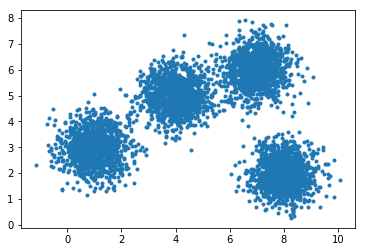

In [45]:
plt.scatter(X[:,0],X[:,1],marker='.')

In [46]:
#Set up the k mean cluster parameters
#init->Initialize the arbitrary centres, n_cluster->total number of cluster, n_init=total trial before taking ultimaye output
k_mean_cluster=KMeans(init="k-means++", n_clusters=4, n_init=12)

In [38]:
#Fitting the data
k_mean_cluster.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=12, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [39]:
#taking the output labels
k_means_labels=k_mean_cluster.labels_

In [40]:
#taking the original centers of the clusters
k_means_cluster_centers=k_mean_cluster.cluster_centers_

In [41]:
k_mean_centres

array([[4.00277866, 5.00324454],
       [7.00924075, 6.00244233],
       [7.98138512, 1.96284352],
       [1.00725385, 2.99781946]])

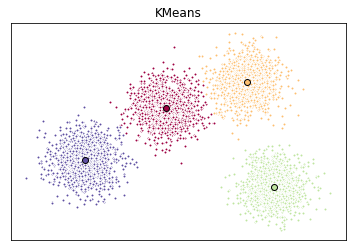

In [42]:
# Initialize the plot with the specified dimensions.
fig = plt.figure(figsize=(6, 4))

# Colors uses a color map, which will produce an array of colors based on
# the number of labels there are. We use set(k_means_labels) to get the
# unique labels.
colors = plt.cm.Spectral(np.linspace(0, 1, len(set(k_means_labels))))

# Create a plot
ax = fig.add_subplot(1, 1, 1)

# For loop that plots the data points and centroids.
# k will range from 0-3, which will match the possible clusters that each
# data point is in.
for k, col in zip(range(len([[4,4], [-2, -1], [2, -3], [1, 1]])), colors):

    # Create a list of all data points, where the data poitns that are 
    # in the cluster (ex. cluster 0) are labeled as true, else they are
    # labeled as false.
    my_members = (k_means_labels == k)
    
    # Define the centroid, or cluster center.
    cluster_center = k_means_cluster_centers[k]
    
    # Plots the datapoints with color col.
    ax.plot(X[my_members, 0], X[my_members, 1], 'w', markerfacecolor=col, marker='.')
    
    # Plots the centroids with specified color, but with a darker outline
    ax.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,  markeredgecolor='k', markersize=6)

# Title of the plot
ax.set_title('KMeans')

# Remove x-axis ticks
ax.set_xticks(())

# Remove y-axis ticks
ax.set_yticks(())

# Show the plot
plt.show()